In [35]:
from TemporalNetwork import ContTempNetwork
import matplotlib.pyplot as plt
import numpy as np
import pickle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [23]:
net = ContTempNetwork.load('evolving_SBM_net_2activities')

### Descriptive Plots

In [32]:
t_start = 0
t_end = 200
switch = (t_end - t_start) / 2
matrix1 = net.compute_static_adjacency_matrix(start_time=t_start, end_time=switch).toarray()
matrix2 = net.compute_static_adjacency_matrix(start_time=switch, end_time=t_end).toarray()

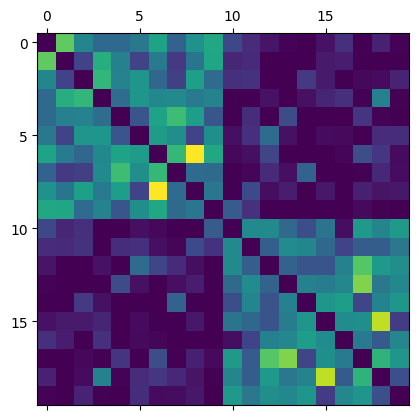

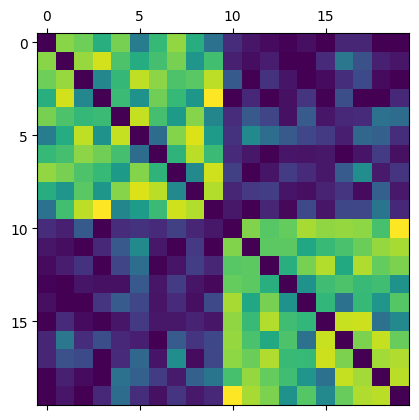

In [33]:
plt.matshow(matrix1)
plt.matshow(matrix2)

In [29]:
net.compute_laplacian_matrices(save_adjacencies=True, random_walk=False)
number_active_events = []
for i,t in enumerate(net.times[:-1]):
    number_active_events.append(np.sum(net.adjacencies[i].toarray()) / 2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


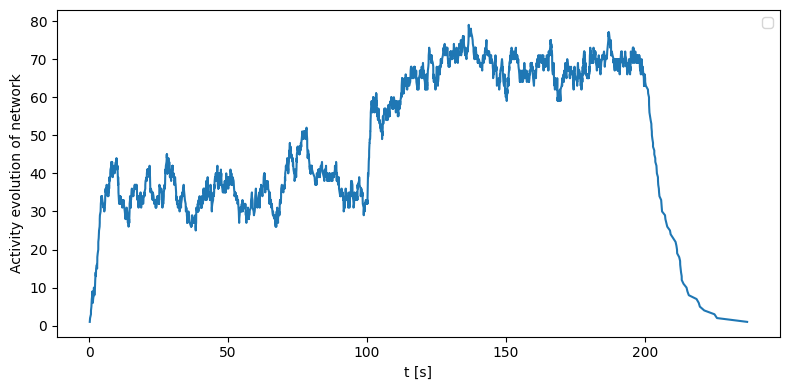

In [30]:
fig, ax = plt.subplots(1,1, figsize = (8, 4))

ax.plot(net.times[:-1], number_active_events)

ax.set_xlabel("t [s]")
ax.set_ylabel("Activity evolution of network")

plt.legend()
plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/evolving_SBM/evolving_SBM_activity_function.png', format='png', dpi=300, bbox_inches='tight')

## LCE

In [36]:
selected_lamdas = np.logspace(-5,0,10)
windows = [50, 100, 250]

In [ ]:
Conditional_S_selected50 = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/evolving_SBM_2activities/window_S_selected/{windows[0]}/window_S{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected50.append(S_rate['window_S'][f'{lamda:.11f}'])

Conditional_S_selected100 = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/evolving_SBM_2activities/window_S_selected/{windows[1]}/window_S{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected100.append(S_rate['window_S'][f'{lamda:.11f}'])

Conditional_S_selected250 = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/evolving_SBM_2activities/window_S_selected/{windows[2]}/window_S{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected250.append(S_rate['window_S'][f'{lamda:.11f}'])

/tmp/ipykernel_974277/3165440741.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


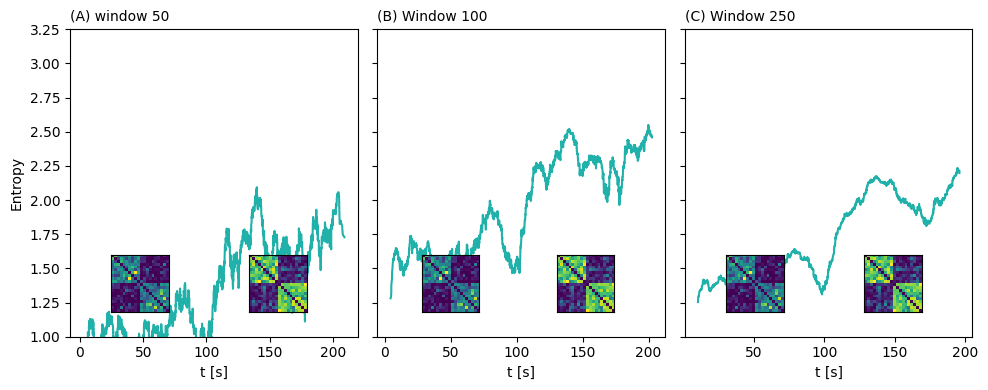

In [53]:
# Start creating the figure
fig = plt.figure(figsize=(10, 4))  # Wider figure for all plots in one row
gs = fig.add_gridspec(1, 3)  # Grid: 1 row, 4 columns

color_forw = 'lightseagreen'
color_back = 'purple'


# Plot1: Motif1
ax_a = fig.add_subplot(gs[0, 0])

index = 6
S = Conditional_S_selected50[index]


ax_a.plot(net.times[windows[0] // 2 + 1: -windows[0] // 2], S[1:], color=color_forw, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("Entropy")
ax_a.set_ylim(1, 3.25)
ax_a.set_title("(A) window 50", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1, matrix2]
positions = [0.12, 0.60]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    #inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# Plot2: Motif 3
ax_a = fig.add_subplot(gs[0, 1], sharey=ax_a)
plt.setp(ax_a.get_yticklabels(), visible=False)

index = 6
S = Conditional_S_selected100[index]

ax_a.plot(net.times[windows[1] // 2 + 1: -windows[1] // 2], S[1:], color=color_forw, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_title("(B) Window 100", loc='left', fontsize=10)
ax_a.set_ylim(1, 3.25)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1, matrix2]
positions = [0.13, 0.60]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    #inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# Plot3: Motif 5
ax_a = fig.add_subplot(gs[0, 2], sharey = ax_a)
plt.setp(ax_a.get_yticklabels(), visible=False)


index = 5
S = Conditional_S_selected250[index]

ax_a.plot(net.times[windows[2] // 2 + 1: -windows[2] // 2], S[1:], color=color_forw, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_title("(C) Window 250", loc='left', fontsize=10)
ax_a.set_ylim(1, 3.25)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1, matrix2]
positions = [0.12, 0.60]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    #inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# Adjust layout and display
plt.tight_layout()
#plt.savefig('/home/b/skoove/Desktop/evolving_SBM/motifs_fig_b_LCE_slides.png', format='png', dpi=300)
plt.show()